<a href="https://colab.research.google.com/github/Pramathesh1/Capstone-2-BikeSharingPrediction-Regression/blob/main/Team_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# importing relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the data into pandas dataframe
file_location = '/content/drive/MyDrive/Colab Notebooks/Almabetter/Regression Capstone Project/Copy of SeoulBikeData.csv'
df = pd.read_csv(file_location, encoding='latin-1')

# Preliminary Data Exploration

In this section we go through the dataset to get insights and to know its features.

In [4]:
# printing the dataset
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
# print all columns in the dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [6]:
# dataset dimensions
df.shape

(8760, 14)

The dataset has 14 columns and 8760 rows. 8760 rows mean we have data for 365 days, from 1 December 2017 to 30 November 2018, for every hour in a day as 365*24 = 8760. 

In [7]:
# getting statistical info on the columns
df.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We see the data type of the variables. We note here that the date variable is string type.

# Data Wrangling

### Checking Null values

In [9]:
# checking null values in each column
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

The dataset has no null values in any column.

### Checking duplicate rows

Here, duplicate rows are checked and if found are removed from the dataset

In [10]:
df.duplicated().sum()

0

No duplicate rows found so we proceed.

### Extracting Month and Day of the week from Date column

As noted before, Date column has string datatype. So we convert that to datetime object using pandas datetime module.

In [11]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

Date variable is converted to datetime object. We can extract month and day from a particular date.

In [13]:
df['Date'][1].month_name()

'December'

In [14]:
df['Date'][1].day_name()

'Friday'

In [15]:
df['Date'][1]

Timestamp('2017-12-01 00:00:00')

Creating Month and Day of the week columns from Date variable.

In [16]:
df['Month'] = df['Date'].apply(lambda x: x.month_name())
df['Day of Week'] = df['Date'].apply(lambda x: x.day_name())

In [17]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day of Week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday


### Removing Non Functioning days

The "Functioning Day" column gives the info whether the rental service was available for that day. The rows that have the value "No" for that column means the rental service was unavailable and so the Rented Bike Count is 0 for all those rows. So we remove those rows (295 in number) as these don't give the absolute picture of other features affecting the output and so may negatively affect model predictions.`

In [18]:
# data on non functioning day
df[df['Functioning Day'] == 'No']

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day of Week
3144,2018-04-11,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No,April,Wednesday
3145,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No,April,Wednesday
3146,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No,April,Wednesday
3147,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No,April,Wednesday
3148,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No,April,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,2018-11-09,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No,November,Friday
8252,2018-11-09,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No,November,Friday
8253,2018-11-09,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,November,Friday
8254,2018-11-09,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,November,Friday


In [19]:
# Sum of bikes rented when on non functioning days
df[df['Functioning Day'] == 'No']['Rented Bike Count'].sum()

0

In [20]:
df.drop(df[df['Functioning Day'] == 'No'].index, inplace = True)
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day of Week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Friday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Friday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Friday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Friday


In [21]:
df['Functioning Day'].unique()

array(['Yes'], dtype=object)

Now the dataframe is free from non functioning days. We can also see the number of rows has reduced from 8760 to 8465.

# Exploratory Data Analysis

In this section, we visualize the data and explore the variables before going for model building.

## Pairplot

The Seaborn Pairplot allows us to plot pairwise relationships between numeric variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

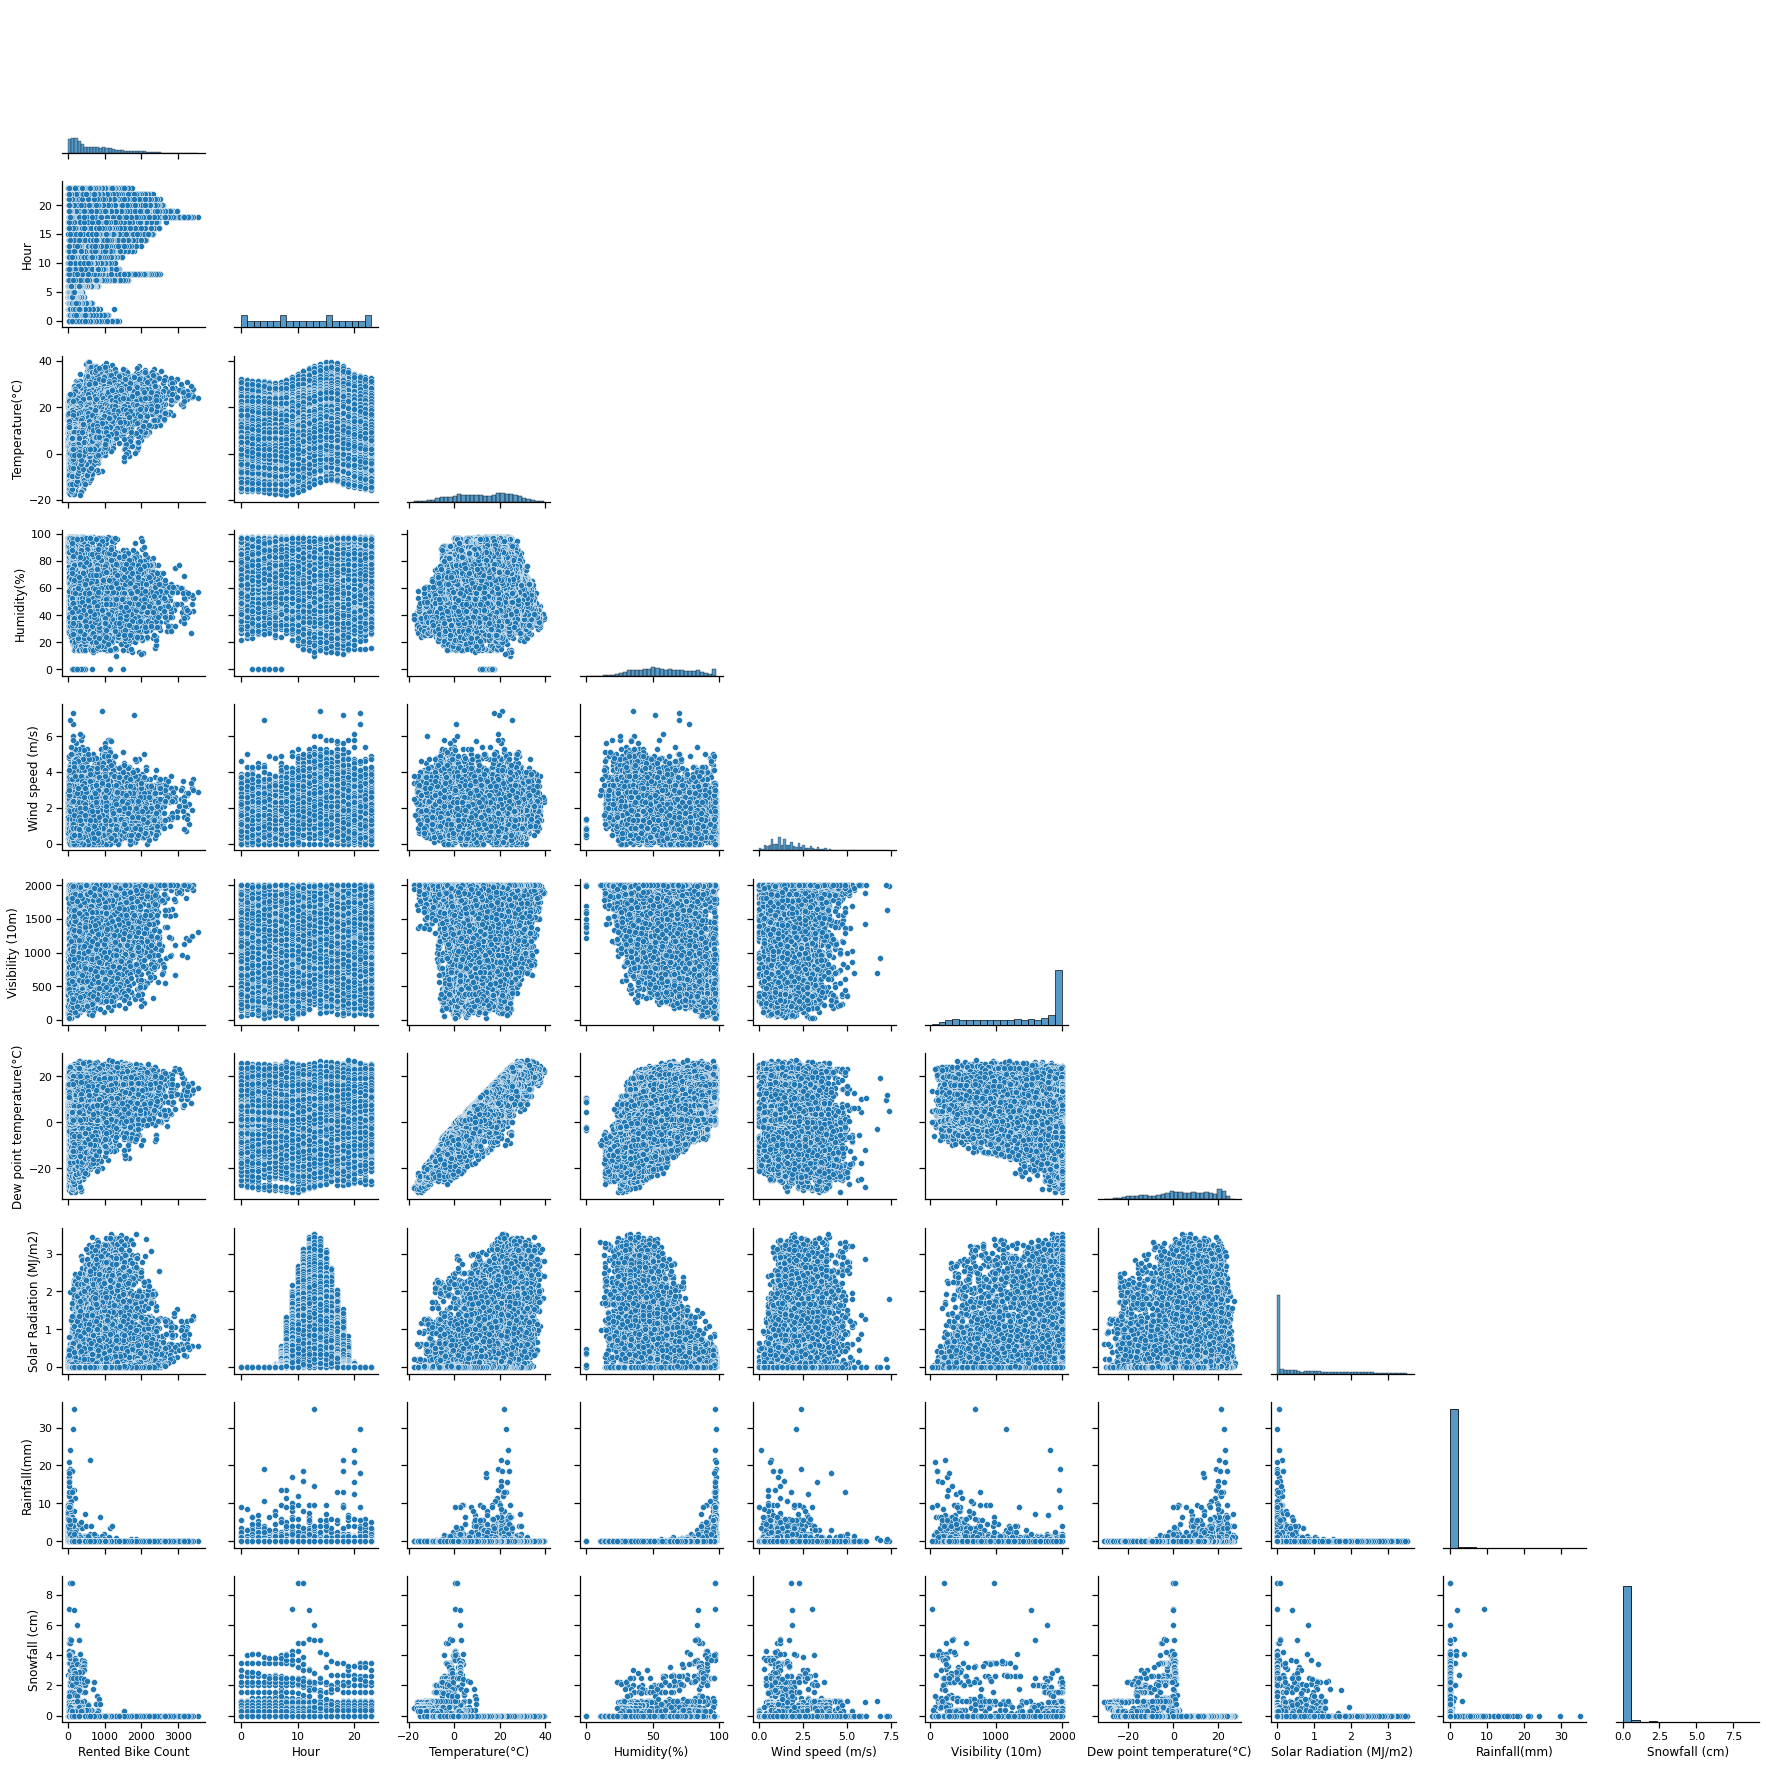

In [22]:
# adjusting labelsize for seaborn and pairplot
sns.set_context("notebook", rc={"axes.labelsize":12})
sns.pairplot(df, corner = True)

We note that the distribution between Temperature and Dew Point Temperature is linearly distributed. Other plots are fairly scattered.

# Feature Engineering

Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. Feature engineering in machine learning aims to improve the performance of models.

## Checking Multicollinearity

Multicollinearity occurs when independent variables in a regression model are correlated. Moderate multicollinearity may not be problematic. However, severe multicollinearity is a problem because it can increase the variance of the coefficient estimates and make the estimates very sensitive to minor changes in the model. Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of your regression model. It mainly affects the multiple linear regression models and tree based models are mostly immune to it.

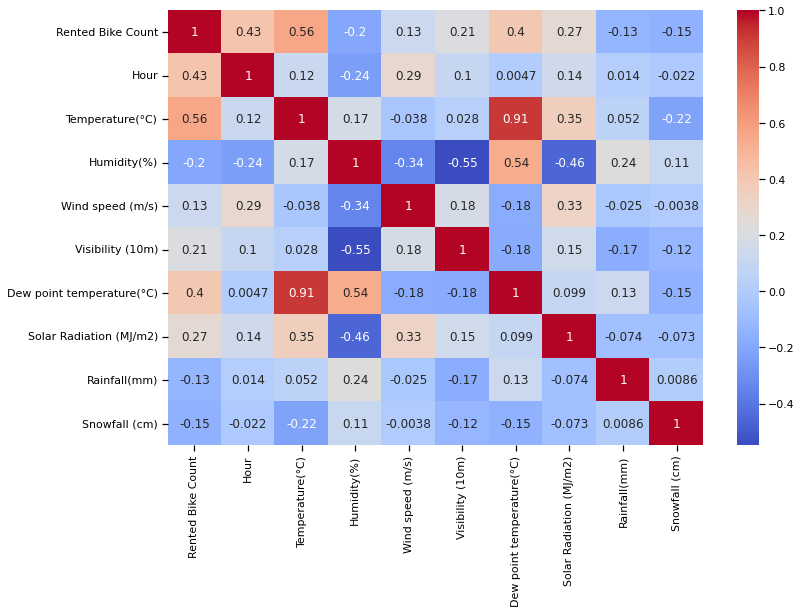

In [23]:
# checking correlation using heatmap
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

The heatmap shows that Temperature and Dew point temperature are the most linearly correlated features with correlation coefficient of 0.91. This was also inferred from the pairplot in EDA section.

### Variation Inflation Factor

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. It can estimate how much the variance of a regression coefficient is inflated due to multicollinearity. A large VIF on an independent variable indicates a highly collinear relationship to the other variables.

In [24]:
# creating a function to calculate VIF for all numeric variables in the dataset
# we import variation_inflation_factor() function from Statsmodels module
def calc_vif(X):
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i ) for i in range(len(X.columns))]
  return vif

In [25]:
# finding vif for numeric features
calc_vif(df[[i for i in df.describe().columns]])

,variables,VIF
0,Rented Bike Count,4.674615
1,Hour,5.159976
2,Temperature(°C),36.306687
3,Humidity(%),5.475162
4,Wind speed (m/s),4.816527
5,Visibility (10m),9.100510
6,Dew point temperature(°C),17.447780
7,Solar Radiation (MJ/m2),2.897848
8,Rainfall(mm),1.110871
9,Snowfall (cm),1.123164


As expected, the most correlated features (Temperature and Dew Point Temperature) in the dataset have very high VIF. The acceptable limit for VIF is around 10. Now we check the VIF for dataset by not including the Dew Point Temperature feature.

In [26]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Dew point temperature(°C)']]])

,variables,VIF
0,Rented Bike Count,4.617043
1,Hour,4.815356
2,Temperature(°C),4.589017
3,Humidity(%),5.048064
4,Wind speed (m/s),4.625286
5,Visibility (10m),4.880668
6,Solar Radiation (MJ/m2),2.243573
7,Rainfall(mm),1.110039
8,Snowfall (cm),1.122836


Now the VIF for all numeric features is in acceptable limits. So we'll drop the Dew Point Temperature feature.

## Removing Redundant Columns

In [27]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Day of Week'],
      dtype='object')

Along with dew point temperature, we also remove the date column as we have extracted the month and day already. We also remove Functioning day feature as it now contains only one unique value.

In [28]:
df.drop(columns = ['Dew point temperature(°C)','Date','Functioning Day'], inplace = True)

In [29]:
df[25:35]

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month,Day of Week
25,308,1,-2.2,86,0.6,990,0.00,0.0,0.0,Winter,No Holiday,December,Saturday
26,262,2,-2.9,86,1.5,1256,0.00,0.0,0.0,Winter,No Holiday,December,Saturday
27,167,3,-3.5,81,2.2,1221,0.00,0.0,0.0,Winter,No Holiday,December,Saturday
28,89,4,-3.8,79,2.0,1167,0.00,0.0,0.0,Winter,No Holiday,December,Saturday
29,79,5,-4.0,79,1.5,1202,0.00,0.0,0.0,Winter,No Holiday,December,Saturday
30,70,6,-4.3,82,2.1,1178,0.00,0.0,0.0,Winter,No Holiday,December,Saturday
31,146,7,-4.4,81,2.5,1276,0.00,0.0,0.0,Winter,No Holiday,December,Saturday
32,219,8,-4.2,79,2.1,1436,0.01,0.0,0.0,Winter,No Holiday,December,Saturday
33,328,9,-2.9,68,1.6,1487,0.30,0.0,0.0,Winter,No Holiday,December,Saturday
34,334,10,-0.4,57,1.6,1309,0.80,0.0,0.0,Winter,No Holiday,December,Saturday


## Converting "Holiday" categorical variable to Binary variable

The "Holiday" column has 2 values - Holiday and No Holiday. So we convert the contents into 1 for Holiday and 0 for No Holiday.

In [30]:
df['Holiday'] = (df['Holiday'] == 'Holiday')*1
df[500:515]

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month,Day of Week
500,288,20,0.2,72,0.7,990,0.00,0.0,0.8,Winter,0,December,Thursday
501,248,21,-0.4,74,0.6,1065,0.00,0.0,0.8,Winter,0,December,Thursday
502,252,22,-1.1,78,0.6,865,0.00,0.0,0.8,Winter,0,December,Thursday
503,212,23,-1.5,79,0.6,821,0.00,0.0,0.8,Winter,0,December,Thursday
504,196,0,-1.7,79,0.5,794,0.00,0.0,0.8,Winter,1,December,Friday
505,250,1,-1.6,79,0.6,784,0.00,0.0,0.8,Winter,1,December,Friday
506,161,2,-1.1,79,0.7,736,0.00,0.0,0.8,Winter,1,December,Friday
507,99,3,-0.6,76,0.5,789,0.00,0.0,0.7,Winter,1,December,Friday
508,64,4,-0.3,76,0.9,760,0.00,0.0,0.7,Winter,1,December,Friday
509,76,5,-0.2,73,0.8,880,0.00,0.0,0.7,Winter,1,December,Friday


In [31]:
df['Holiday'].unique()

array([0, 1])

## Creating Dummy variables

Variables that do not have any natural scale of measurement, usually indicate the presence or absence of a “quality” or an attribute like yes or no, so they are defined on a nominal scale. Such variables can be quantified by artificially constructing the variables that take the values, e.g., 1 and 0 where “1” indicates usually the presence of an attribute and “0” usually indicates the absence of an attribute.

A dummy variable is a variable that takes values of 0 and 1, where the values indicate the presence or absence of something (e.g., a 0 may indicate a placebo and 1 may indicate a drug). Where a categorical variable has more than two categories, it can be represented by a set of dummy variables, with one variable for each category. So we create dummy variables for the features Seasons, Month, Day of Week and also Hour as it is not ordinal variable but nominal variable.

In [32]:
# pandas function to get dataframe with categorical variables converted to dummy variables
df = pd.get_dummies(df)
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Month_November,Month_October,Month_September,Day of Week_Friday,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,0,...,1,0,0,1,0,0,0,0,0,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,0,...,1,0,0,1,0,0,0,0,0,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,0,...,1,0,0,1,0,0,0,0,0,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,0,...,1,0,0,1,0,0,0,0,0,0


In [33]:
df = pd.get_dummies(df, columns = ['Hour'])
pd.options.display.max_columns = 135
df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Day of Week_Friday,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
# making sure we have all numeric datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8465 non-null   int64  
 1   Temperature(°C)          8465 non-null   float64
 2   Humidity(%)              8465 non-null   int64  
 3   Wind speed (m/s)         8465 non-null   float64
 4   Visibility (10m)         8465 non-null   int64  
 5   Solar Radiation (MJ/m2)  8465 non-null   float64
 6   Rainfall(mm)             8465 non-null   float64
 7   Snowfall (cm)            8465 non-null   float64
 8   Holiday                  8465 non-null   int64  
 9   Seasons_Autumn           8465 non-null   uint8  
 10  Seasons_Spring           8465 non-null   uint8  
 11  Seasons_Summer           8465 non-null   uint8  
 12  Seasons_Winter           8465 non-null   uint8  
 13  Month_April              8465 non-null   uint8  
 14  Month_August            

# Machine Learning Model Implementation

First we separate the independent features and dependent feature.

In [35]:
df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Month_April',
       'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September',
       'Day of Week_Friday', 'Day of Week_Monday', 'Day of Week_Saturday',
       'Day of Week_Sunday', 'Day of Week_Thursday', 'Day of Week_Tuesday',
       'Day of Week_Wednesday', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23'],
      dtype='object')

In [36]:
# output of model is the Rented bike count
# creating list of feature names first
dependent_var = 'Rented Bike Count'
independent_var = list(df.columns)
independent_var.remove(dependent_var)

In [37]:
independent_var

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Holiday',
 'Seasons_Autumn',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Month_April',
 'Month_August',
 'Month_December',
 'Month_February',
 'Month_January',
 'Month_July',
 'Month_June',
 'Month_March',
 'Month_May',
 'Month_November',
 'Month_October',
 'Month_September',
 'Day of Week_Friday',
 'Day of Week_Monday',
 'Day of Week_Saturday',
 'Day of Week_Sunday',
 'Day of Week_Thursday',
 'Day of Week_Tuesday',
 'Day of Week_Wednesday',
 'Hour_0',
 'Hour_1',
 'Hour_2',
 'Hour_3',
 'Hour_4',
 'Hour_5',
 'Hour_6',
 'Hour_7',
 'Hour_8',
 'Hour_9',
 'Hour_10',
 'Hour_11',
 'Hour_12',
 'Hour_13',
 'Hour_14',
 'Hour_15',
 'Hour_16',
 'Hour_17',
 'Hour_18',
 'Hour_19',
 'Hour_20',
 'Hour_21',
 'Hour_22',
 'Hour_23']

In [38]:
X = df[independent_var]
X.tail()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Day of Week_Friday,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
8755,4.2,34,2.6,1894,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8756,3.4,37,2.3,2000,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8757,2.6,39,0.3,1968,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8758,2.1,41,1.0,1859,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8759,1.9,43,1.3,1909,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
y = df[[dependent_var]]
y.head()

,Rented Bike Count
0,254
1,204
2,173
3,107
4,78


### Splitting data into training set and testing set

The train-test split is a technique for evaluating the performance of a machine learning algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset. The objective is to estimate the performance of the machine learning model on new data i.e. data not used to train the model.

In [40]:
# splitting in ratio train:test = 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state = 0)

In [41]:
X_train.shape, y_train.shape

((6348, 55), (6348, 1))

In [42]:
X_test.shape, y_test.shape

((2117, 55), (2117, 1))

Previously we had 8465 rows. Now training set has 0.75*8465 = 6348 rows and remaining 2117 rows in testing data.

## Decision Tree

First we create a simple Decision tree model without specifying any parameter values i.e. we are letting the tree to overfit to training data and we evaluate it.

In [43]:
# creating decision tree model without any hyperparameter tuning
regressor_dt = DecisionTreeRegressor()
# fitting to train data
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor()

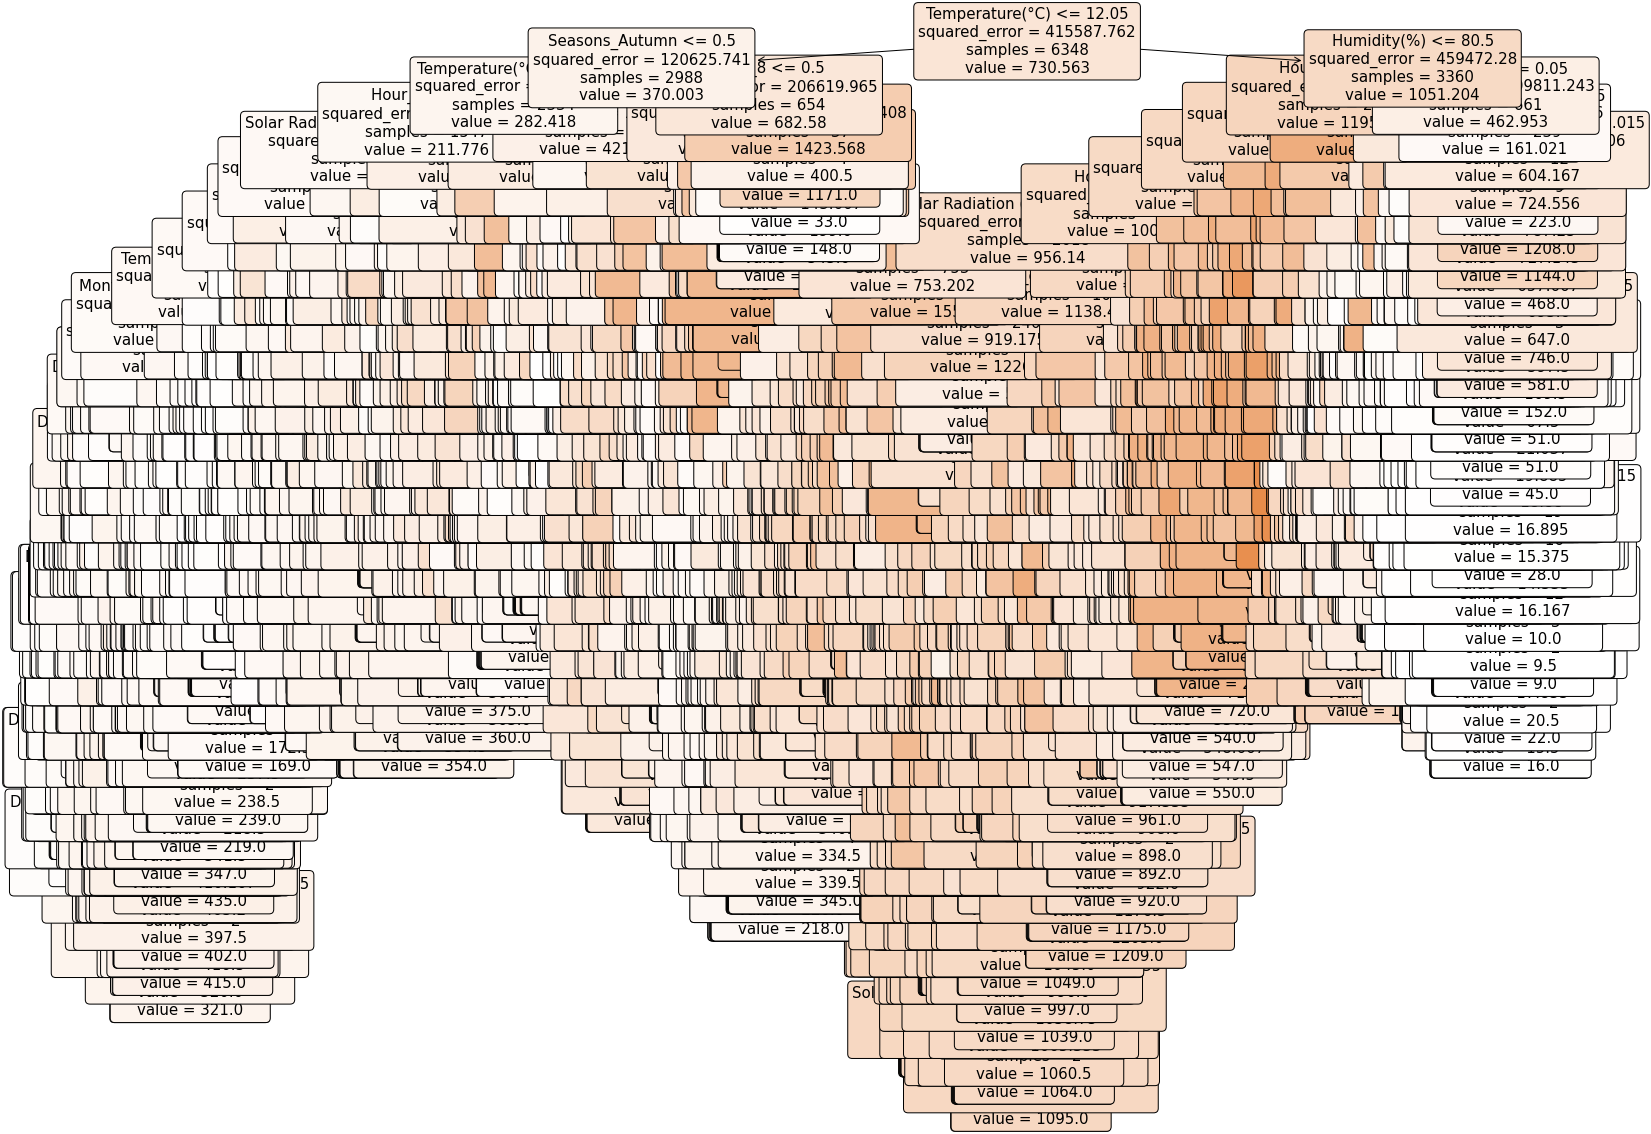

In [44]:
# Visualizing the tree
plt.figure(figsize=(25,20))
plot_tree(regressor_dt, feature_names = independent_var, filled = True, rounded = True, fontsize = 15)
plt.show()

The tree has overfit and the visualization is very clumsy. Before proceeding with predicting with test data, we see the attributes of this tree.

In [45]:
# get default tree parameters
regressor_dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [46]:
print('Depth of Tree: ',regressor_dt.get_depth())

Depth of Tree:  39


In [47]:
print('Number of leaf nodes: ',regressor_dt.get_n_leaves())

Number of leaf nodes:  6255


Now we predict the output for testing data using the tree created.

In [48]:
y_pred = regressor_dt.predict(X_test)

In [49]:
y_test[:10], y_pred[:10]

(      Rented Bike Count
 651                  86
 6951                222
 1815                461
 989                  42
 1916                213
 6745               1001
 44                  359
 1270                170
 5224               1635
 3534                427,
 array([ 100.,  594.,  797.,   45.,  232., 1056.,  458.,  123., 1462.,
         464.]))

Using the evaluation metrics to evaluate the performance of our model on test data.

In [50]:
print('MSE : ', mean_squared_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE :  83378.4610297591
RMSE :  288.75328747870407
MAE :  165.4435521965045
R2 score :  0.7933529090586877
Adjusted R2 :  0.7878383093489487


Now we create another decision tree and we tune the hyperparameters to avoid overfitting and try to improve the predictions.

In [51]:
regressor_dt2 = DecisionTreeRegressor( max_leaf_nodes = 200, min_samples_leaf = 10, max_depth = 15)
regressor_dt2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, max_leaf_nodes=200, min_samples_leaf=10)

In [52]:
y_pred2 = regressor_dt2.predict(X_test)

In [53]:
# Evaluating our model
print('MSE : ', mean_squared_error(y_test,y_pred2))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,y_pred2)))
print('MAE : ', mean_absolute_error(y_test,y_pred2))
print('R2 score : ', r2_score(y_test, y_pred2))
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE :  84732.21709846475
RMSE :  291.0879885850063
MAE :  182.55399470668564
R2 score :  0.7899977289559712
Adjusted R2 :  0.7843935926593086


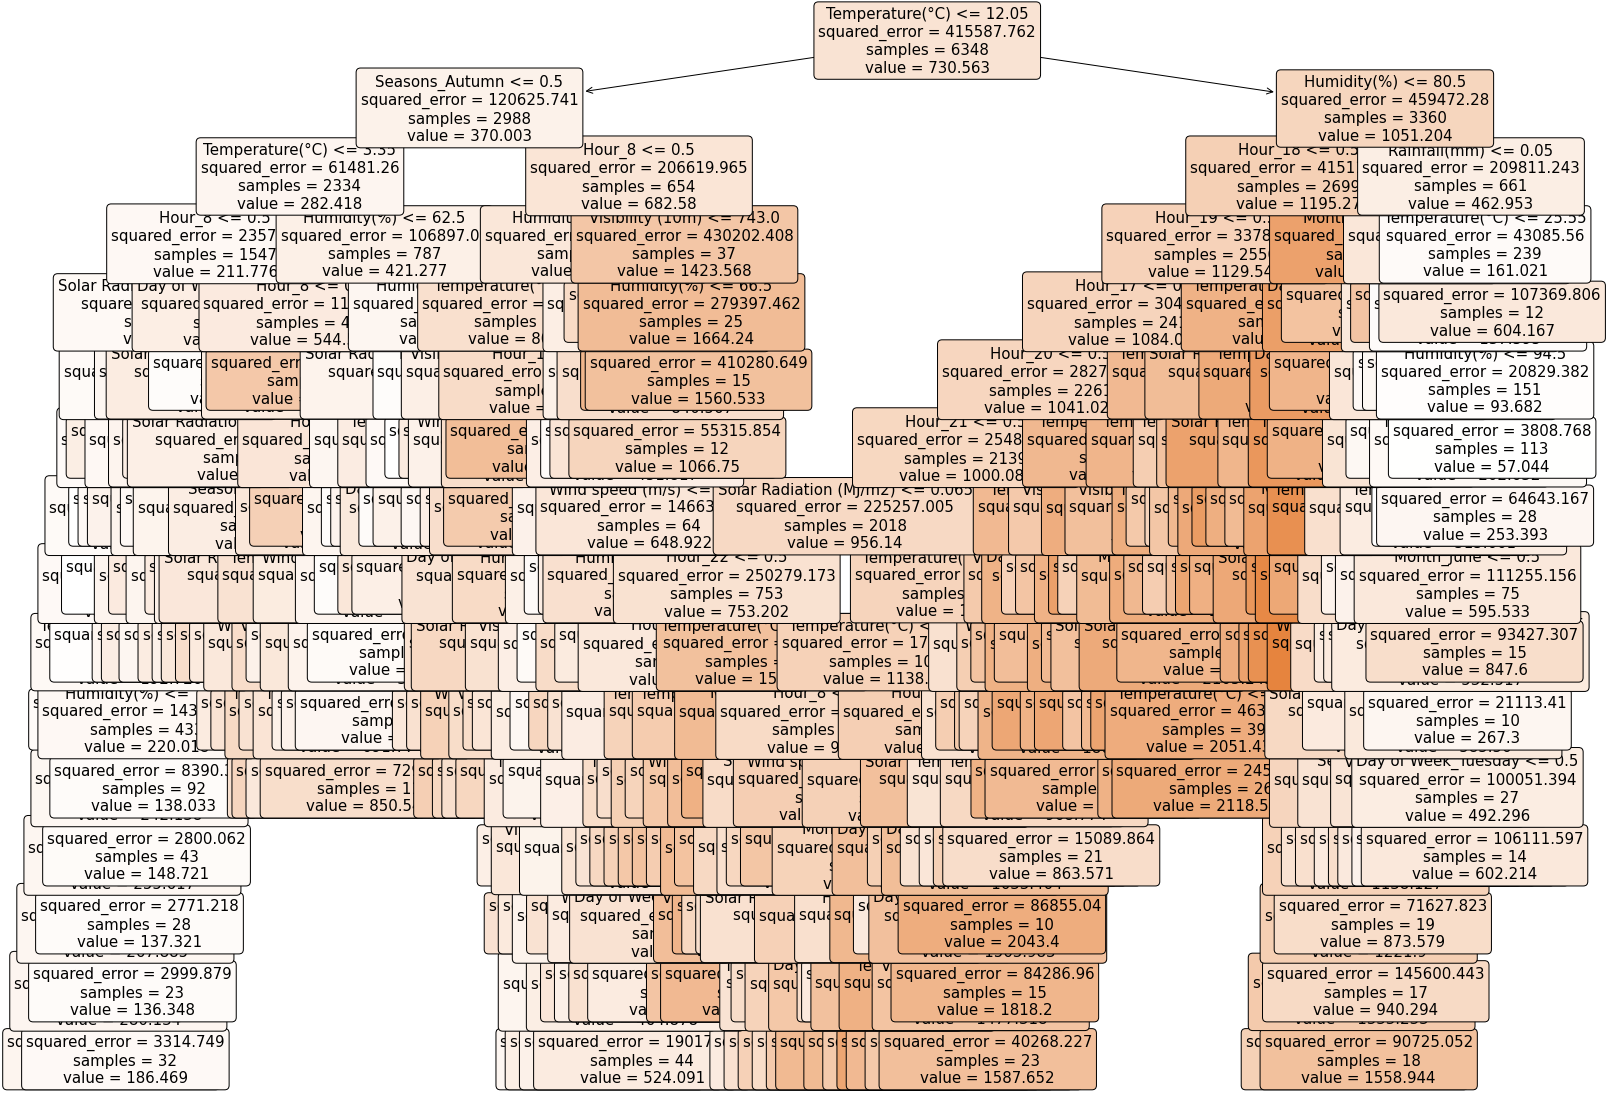

In [54]:
# visualizing tree
plt.figure(figsize=(25,20))
plot_tree(regressor_dt2, feature_names = independent_var, filled = True, rounded = True, fontsize = 15)
plt.show()

As we controlled the hyperparameters, we avoided overfitting and improved our predictions to some extent as evident from the metrics.

## Random Forest

Implementing Random Forest model which uses multiple decision trees and see if it performs better than single decision tree.

In [55]:
# model created
regressor_rf = RandomForestRegressor()
# model fit to train data
regressor_rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor()

In [56]:
# predicting test data
y_pred_rf = regressor_rf.predict(X_test)

In [57]:
# evaluating model
print('MSE : ', mean_squared_error(y_test,y_pred_rf))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print('MAE : ', mean_absolute_error(y_test,y_pred_rf))
print('R2 score : ', r2_score(y_test, y_pred_rf))
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE :  46732.73256367501
RMSE :  216.17754870401092
MAE :  125.79974964572509
R2 score :  0.8841765233280694
Adjusted R2 :  0.8810856493751552
